In [100]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Методы оптимизации

Как было показано на лекции, большинство методов машинного обучения сводятся к поиску параметров, которые минимизируют ошибку на тренировочной выборке:
$$
\min_{w} L(w; D)
$$
Здесь:
* $D$ — размеченная обучающая выборка, $\{x_i, y_i\}_{i=1}^N$
* $L$ — функция потерь
* $w$ — настраиваемые веса алгоритма

В более общем виде задачу можно записать так:
$$
\min_{x} f(x)
$$
Здесь:
* $x$ — вектор значений
* $f$ — функция, принимающая вектор в качестве аргумента и выдающая числовое значение.

На семинаре рассмотрим подробнее методы минимизации функции, которые рассматривались на лекции.

## Градиентный спуск

Для оптимизации возьмем простую функцию $f(x) = x^3 - 2x^2 + 2$

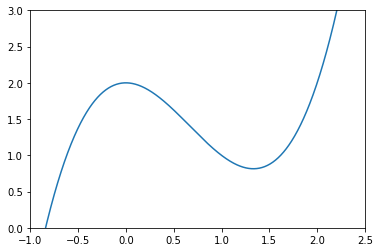

In [102]:
f = lambda x: x ** 3 - 2*x ** 2 + 2
df = lambda x: 3 * x ** 2 - 4 * x # производная
x = np.linspace(-1, 2.5, 1000)
plt.plot(x, f(x))
plt.xlim([-1, 2.5])
plt.ylim([0, 3])
plt.show()

И определим функцию, которая будет оптимизировать функцию $f(x)$ градиентным спуском с заданным постоянным шагом (он же learning rate, темп обучения).

In [103]:
def optimize_and_plot_steps(learning_rate, x_new=2, compute_learning_rate=None):
    x_old = 0
    # x_new — точка старта
    eps = 0.0001
    x_list, y_list = [x_new], [f(x_new)] # инициализируем список координат и значений функций при итерации
    
    # спускаемся, пока разница между координатами не достигла требуемой точности
    i = 0
    while abs(x_new - x_old) > eps: 
        x_old = x_new
        # считаем направление спуска
        direction = -df(x_old)
        # обновляем значение темпа обучения, если нам задана функция для этого
        if compute_learning_rate is not None:
            learning_rate = compute_learning_rate(i, learning_rate)
        # делаем шаг
        x_new = x_old + learning_rate * direction
        # запоминаем очередной шаг минимизации
        x_list.append(x_new)
        y_list.append(f(x_new))
        i += 1
        
    print("Найденный локальный минимум:", x_new)
    print("Количество шагов:", len(x_list))
    
    plt.figure(figsize=[10,3])
    
    plt.subplot(1,2,1)
    plt.scatter(x_list, y_list, c="r", edgecolors='k')
    plt.plot(x_list, y_list, c="r")
    plt.plot(x, f(x), c="b")
    plt.xlim([-1,2.5])
    plt.ylim([0,3])
    plt.title("Descent trajectory")

    plt.subplot(1,2,2)
    plt.scatter(x_list,y_list,c="r", edgecolors='k')
    plt.plot(x_list,y_list,c="r")
    plt.plot(x,f(x), c="b")
    plt.xlim([1.2,2.1])
    plt.ylim([0,3])
    plt.title("Descent trajectory (zoomed in)")
    plt.show()

Попробуем оптимизацию с шагом 0.1

Найденный локальный минимум: 1.3334253508453249
Количество шагов: 17


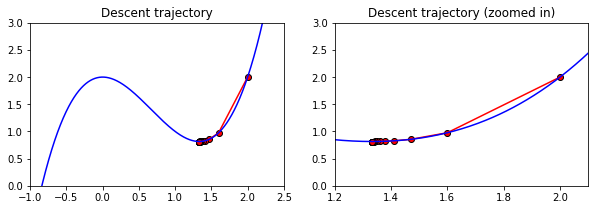

In [104]:
optimize_and_plot_steps(0.1)

Возьмем шаг побольше.

Найденный локальный минимум: 1.3333020223878838
Количество шагов: 15


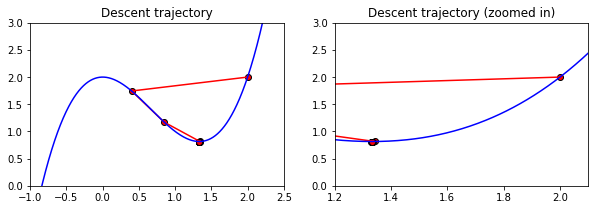

In [105]:
optimize_and_plot_steps(0.4)

Что, если взять 0.5?

Найденный локальный минимум: 0.0
Количество шагов: 3


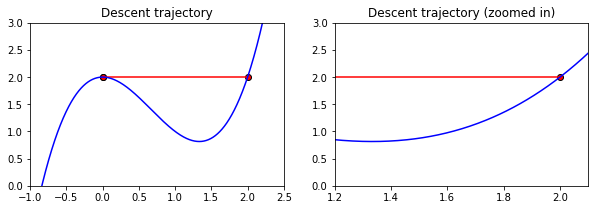

In [106]:
optimize_and_plot_steps(0.5)

Застопорились в нуле, т.к. нашли точный локальный максимум. В нем производная равна нулю и мы никуда не можем сдвинуться. А если взять 0.49?

Найденный локальный минимум: 1.3333812706364907
Количество шагов: 188


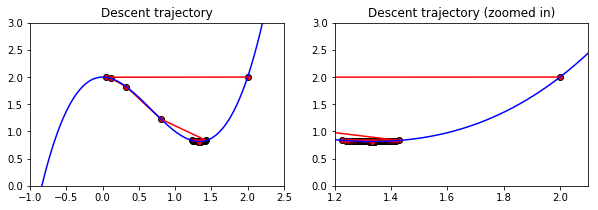

In [107]:
optimize_and_plot_steps(0.49)

Что, если взять 0.51?

In [108]:
optimize_and_plot_steps(0.51)

OverflowError: (34, 'Result too large')

Мы улетели далеко влево. Это можно понять, распечатав значения x_new.

Теперь возьмём маленький шаг. Например, 0.05.

Найденный локальный минимум: 1.3337297312792562
Количество шагов: 32


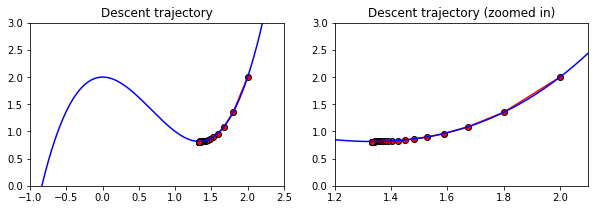

In [23]:
optimize_and_plot_steps(0.05)

0.01?

Найденный локальный минимум: 1.3356881625009205
Количество шагов: 129


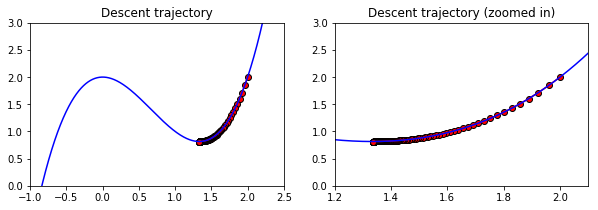

In [24]:
optimize_and_plot_steps(0.01)

Чем меньше шаг, тем медленнее мы идём к минимум (и можем вдобавок застрять по пути). Чем больше темп обучения, тем большие расстояния мы перепрыгиваем (и имеем гипотетическую возможность найти минимум получше). Хорошая стратегия — начинать с достаточно большого шага (чтобы хорошо попутешествовать по функции), а потом постепенно его уменьшать, чтобы стабилизировать процесс обучения в каком-то локальном минимуме.

Теперь будем изменять шаг динамически:
$lr(i + 1) = lr(i) * 0.9$.

In [25]:
def compute_learning_rate(i, prev_lr):
    return prev_lr * 0.9

Найденный локальный минимум: 1.3333376009455882
Количество шагов: 7


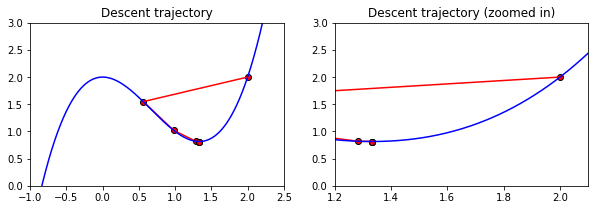

In [26]:
optimize_and_plot_steps(0.4, compute_learning_rate=compute_learning_rate)

Если сравнивать с постоянным темпом обучения, то мы нашли минимум в 2 раза быстрее.

Найденный локальный минимум: 1.3333020223878838
Количество шагов: 15


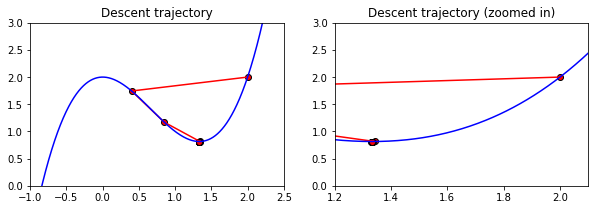

In [27]:
optimize_and_plot_steps(0.4)

Это, конечно, искуственный пример, но такая же идея используются для обучения алгоритмов машинного обучения с миллионами параметров, функции потерь которых имеют очень сложную структуру и не поддаются визуализации.

## Настройка линейной регрессии с помощью градиентного спуска

Рассмотрим теперь реальные данные и попробуем использовать градиентный спуск для решения задачи линейной регрессии.

Загрузите файл food_trucks.txt. В нём два столбца значений — количество жителей в городе и доход грузовика с уличной едой в этом городе.

In [28]:
import pandas as pd

df = pd.read_csv('food_trucks.txt', header = None)
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Визуализируйте данные. По оси X — население города, по оси Y — доход грузовика.

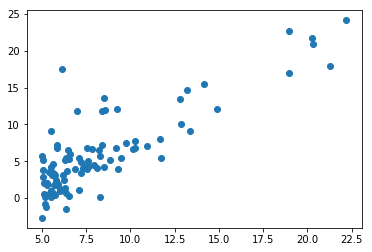

In [29]:
plt.scatter(df[0], df[1])

Вспомним функцию потерь линейной регрессии:
$$
L(w) = \frac{1}{2m} \sum_{i=1}^m (h(x^i, w) - y^i)^2
$$
Здесь $h(x, w) = w^Tx = w_0 + w_1 x_1$ (предполагается, что $x_0=1$ — дополнительный признак для удобства).
$(x^i, y^i)$ — i-ый объект выборки.
Тогда правило обновления весов будет выглядеть следующим образом:
$$
w_j = w_j - \eta\cdot \frac{1}{m}\sum_{i=1}^m(h(x^i, w) - y^i) x^i_j.
$$
Здесь $x^i_j$ — j-ая компонента i-ого объекта.

Определите функцию потерь и её производную. Эти функции имеют один аргумент — вектор весов $w$.

In [30]:
m = df.shape[0]
L = lambda w: sum((w[0]+w[1]*row[0]-row[1])**2 for _, row in df.iterrows())/(2*m)
dL = lambda w: [sum((w[0]+w[1]*row[0]-row[1]) for _, row in df.iterrows())/m, 
                sum((w[0]+w[1]*row[0]-row[1])*row[0] for _, row in df.iterrows())/m]

In [97]:
dL([0.15,0.77])

[0.59391094845360859, -1.4238437725690682]

Напишите функцию минимизации $L(w)$ с помощью градиентного спуска, аналогичную optimize_and_plot_steps. На вход она принимает параметры обучения (темп обучения и начальное значение весов), оптимизирует итеративно функцию потерь, печатает итерации и визуализирует уменьшение функции потерь и найденное решение. Запустите функцию с постоянным темпом обучения и прокомментируйте результаты.

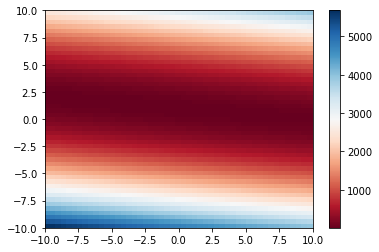

In [90]:
w0, w1 = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50))
Z = np.array([L(w) for w in np.c_[w0.ravel(), w1.ravel()]])
Z = Z.reshape(w0.shape)
plt.pcolormesh(w0, w1, Z, cmap=plt.cm.RdBu)
plt.colorbar()

Найденный локальный минимум: [-0.83490482960423662, 0.88553544433000386] 5.32991621553
Количество шагов: 200


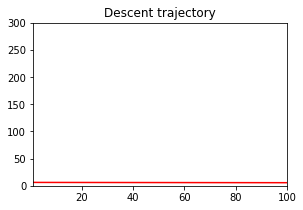

In [89]:
def opt_and_plt(learning_rate, w_new=[0.5,0.8], compute_learning_rate=None, max_steps = 200):
    w_old = [0,0]
    eps = 0.0001
    w_list, L_list = [w_new], [L(w_new)]
    i = 0
    while ((w_new[0] - w_old[0])**2+(w_new[1]-w_old[1])**2)**0.5 > eps and i < max_steps: 
        diff = dL(w_new)
        if compute_learning_rate is not None:
            learning_rate = compute_learning_rate(i, learning_rate)
        w_old = w_new.copy()
        w_new[0] = w_old[0] - learning_rate * diff[0]
        w_new[1] = w_old[1] - learning_rate * diff[1]
        w_list.append(w_new)
        L_list.append(L(w_new))
        i += 1
       
    print("Найденный локальный минимум:", w_new, L(w_new))
    print("Количество шагов:", i)
    
    plt.figure(figsize=[10,3])
    
    plt.subplot(1,2,1)
    plt.plot(range(i+1), L_list, c="r")
    plt.xlim([1,100])
    plt.ylim([0,300])
    plt.title("Descent trajectory")
    
opt_and_plt(0.01)

Измените функцию минимизации так, чтобы темп обучения мог меняться динамически, аналогично примеру выше. Запустите функцию и прокомментируйте результаты.

## Линейная регрессия с батч-оптимизацией

Теперь рассмотрим случай, когда данных в выборке много. В таких случаях используется стохастическая или батч-оптимизация. Первая состоит в том, что на каждом шаге итерации берется один объект, вторая — в том, что берется некоторое небольшое фиксированное количество объектов.

Загрузите данные из файла space_ga.csv и нормализуйте их. Мы будем предсказывать первый столбец по шести остальным. Эти данные получены с выборов в США в 1980 году. Подробнее о столбцах можно прочитать тут: http://mldata.org/repository/data/viewslug/statlib-20050214-space_ga/

Как вы могли заметить, датасет больше предыдущего. На нём мы попробуем батч-оптимизацию.

Измените функцию минимизации так, чтобы на вход они принимала дополнительный параметр — размер батча. Для простоты проверки рекомендуется изменять копию функции, реализованной выше, с измененным именем. Запустите функцию при разных размерах батча. Прокомментируйте результаты.